<a href="https://colab.research.google.com/github/mortezabasati-source/Eget-projekt/blob/main/Egetprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Data Records.csv', sep='\t', header=None, encoding='utf-8')
df = df[0].str.replace('"', '').str.split(',', expand=True)
df.columns = ['Datum', 'Butik', 'Rutt', 'Produkt Type', 'Produkt sort', 'Ordrar', 'Returer', 'Antal_ordrar', 'Antal_returer']
df.head()

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Ordrar,Returer,Antal_ordrar,Antal_returer
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0.0,48.69,0,1
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0.0,34.31,0,1
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0.0,31.19,0,1
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0.0,31.19,0,1
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,97.38,0.0,2,0


# Tar bort kolumnerna 'Ordrar' och 'Returer'

In [24]:
df = df.drop(['Ordrar', 'Returer'], axis=1)
df.head()

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Antal_ordrar,Antal_returer
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0,1
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0,1
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0,1
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0,1
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,2,0


## Konvertera 'datum' till datumformat

###Subtask:
Se till att kolumnen 'Datum' är i ett datetime-format så att vi kan extrahera vecka.


In [25]:
df['Datum'] = pd.to_datetime(df['Datum'])
df.head()

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Antal_ordrar,Antal_returer
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0,1
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0,1
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0,1
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0,1
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,2,0


## Skapa en veckokolumn

### Subtask:
Lägg till en ny kolumn som representerar veckan baserat på 'Datum'-kolumnen.


In [26]:
df['Vecka'] = df['Datum'].dt.isocalendar().week
df.head()

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Antal_ordrar,Antal_returer,Vecka
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0,1,31
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0,1,31
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0,1,31
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0,1,31
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,2,0,31


# Konvertera 'Antal_ordrar' och 'Antal_returer' till numeriska typer

In [27]:
df['Antal_ordrar'] = pd.to_numeric(df['Antal_ordrar'])
df['Antal_returer'] = pd.to_numeric(df['Antal_returer'])
display(df.head())

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Antal_ordrar,Antal_returer,Vecka
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0,1,31
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0,1,31
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0,1,31
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0,1,31
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,2,0,31


## Gruppera efter Butik, Rutt, Produkt Typ, Produkt sort och skapa en ny DataFrame med dessa unika kombinationer
# Skapa en unik artikelnummer för varje kombination
# Vi kan använda indexet och lägga till en startvärde och sedan nollor för att få 6 siffro

In [28]:

unika_artiklar = df.groupby(['Butik', 'Rutt', 'Produkt Type', 'Produkt sort']).size().reset_index(name='count').drop('count', axis=1)

unika_artiklar['Artikel_Nummer'] = (unika_artiklar.index + 100001).astype(str)
display(unika_artiklar.head())

,Butik,Rutt,Produkt Type,Produkt sort,Artikel_Nummer
0,Alina Systems,Diverse & Extra,Pastasallad,Bacon & Kyckling,100001
1,Alina Systems,Diverse & Extra,Pastasallad,Kyckling & Salladsost,100002
2,Alina Systems,Diverse & Extra,Pastasallad,Kyckling Curry,100003
3,Alina Systems,Diverse & Extra,Pastasallad,Ost & Skinka,100004
4,Alina Systems,Diverse & Extra,Varmrätt,Chili con Carne (Paus),100005


## Slå ihop dataframes

### Subtask:
Slå ihop den ursprungliga DataFrame (`df`) med DataFrame som innehåller de unika artikelnumren (`unika_artiklar`) baserat på de gemensamma kolumnerna ('Butik', 'Rutt', 'Produkt Type', 'Produkt sort').


In [29]:
df_merged = pd.merge(df, unika_artiklar, on=['Butik', 'Rutt', 'Produkt Type', 'Produkt sort'], how='left')
display(df_merged.head())

,Datum,Butik,Rutt,Produkt Type,Produkt sort,Antal_ordrar,Antal_returer,Vecka,Artikel_Nummer
0,2024-07-29,ICA Luthagen,Uppsala Rutt,Grönsallad,Kyckling,0,1,31,104219
1,2024-07-29,ICA Luthagen,Uppsala Rutt,Juniorsallad,Krämig Kyckling (Paus),0,1,31,104225
2,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Pestoröra,0,1,31,104239
3,2024-07-29,ICA Luthagen,Uppsala Rutt,Sandwich,Kyckling Curry,0,1,31,104238
4,2024-07-30,ICA Luthagen,Uppsala Rutt,Pastasallad,Ost & Skinka,2,0,31,104234


## Gruppera och summera

### Subtask:
Gruppera den sammanslagna DataFrame efter 'Vecka' och 'Artikel_Nummer' och summera 'Antal_ordrar' och 'Antal_returer'.


In [30]:
df_weekly_summary = df_merged.groupby(['Vecka', 'Artikel_Nummer']).agg({
    'Antal_ordrar': 'sum',
    'Antal_returer': 'sum'
}).reset_index()
display(df_weekly_summary.head())

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer
0,1,100005,0,0
1,1,100008,0,0
2,1,100009,0,0
3,1,100010,0,0
4,1,100011,0,0


# Ta bort rader från df_weekly_summary där både 'Antal_ordrar' och 'Antal_returer' är 0

In [31]:

df_weekly_summary_filtrerad = df_weekly_summary[(df_weekly_summary['Antal_ordrar'] != 0) | (df_weekly_summary['Antal_returer'] != 0)]

display(df_weekly_summary_filtrerad.head())

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer
5,1,100023,1,0
9,1,100028,1,0
14,1,100033,2,0
15,1,100037,1,0
17,1,100039,1,0


## Sammanfattning:

### Viktiga resultat av dataanalys

* Den ursprungliga DataFrame-rapporten sammanfogades framgångsrikt med DataFrame-rapporten som innehöll unika artikelnummer baserade på 'Butik', 'Rutt', 'Produkttyp' och 'Produktsort'.

* Den sammanfogade datan grupperades sedan efter 'Vecka' och 'Artikel\Nummer'.

* Den totala mängden 'Antal\_ordrar' och 'Antal\_returer' beräknades för varje vecka och artikelnummerkombination.

### Insikter eller nästa steg

* Den resulterande datan kan användas för att analysera veckovisa order- och returtrender för varje artikel, vilket kan informera lagerhantering och försäljningsstrategier.

# Task
Analysera sambandet mellan antal ordrar och antal returer från föregående vecka för varje artikelnummer.

## Förbered data

### Subtask:
Se till att den veckovisa sammanfattningen (`df_weekly_summary_filtrerad`) är sorterad efter 'Artikel_Nummer' och 'Vecka' för att säkerställa korrekt skiftning.


In [32]:
df_weekly_summary_filtrerad = df_weekly_summary_filtrerad.sort_values(by=['Artikel_Nummer', 'Vecka'])
display(df_weekly_summary_filtrerad.head())

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer
28759,7,100019,60,0
28760,7,100020,55,0
28761,7,100021,20,0
28762,7,100022,25,0
5,1,100023,1,0


## Skifta returer

### Subtask:
Skifta returer


För att beräkna returerna från föregående vecka för varje artikelnummer måste man förskjuta kolumnen 'Antal_returer' med en vecka inom varje grupp av 'Artikel_Nummer'.

In [33]:
df_weekly_summary_filtrerad['Antal_returer_foreg_vecka'] = df_weekly_summary_filtrerad.groupby('Artikel_Nummer')['Antal_returer'].shift(1)
display(df_weekly_summary_filtrerad.head())

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka
28759,7,100019,60,0,NaN
28760,7,100020,55,0,NaN
28761,7,100021,20,0,NaN
28762,7,100022,25,0,NaN
5,1,100023,1,0,NaN


## Hantera vecka 1

### Subtask:
Ta bort rader som motsvarar vecka 1, eftersom det inte finns någon föregående vecka att jämföra med.


In [34]:
df_weekly_summary_filtrerad = df_weekly_summary_filtrerad[df_weekly_summary_filtrerad['Vecka'] != 1]
display(df_weekly_summary_filtrerad.head(10))

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka
28759,7,100019,60,0,NaN
28760,7,100020,55,0,NaN
28761,7,100021,20,0,NaN
28762,7,100022,25,0,NaN
4375,2,100023,3,0,0.0
9179,3,100023,2,0,0.0
14023,4,100023,2,0,0.0
18864,5,100023,2,0,0.0
23780,6,100023,2,0,0.0
28763,7,100023,2,0,0.0


## Visa resultatet

### Subtask:
Visa de första raderna av den nya DataFrame med den skiftade returdatan.


In [35]:
display(df_weekly_summary_filtrerad.head(40))

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka
28759,7,100019,60,0,NaN
28760,7,100020,55,0,NaN
28761,7,100021,20,0,NaN
28762,7,100022,25,0,NaN
4375,2,100023,3,0,0.0
9179,3,100023,2,0,0.0
14023,4,100023,2,0,0.0
18864,5,100023,2,0,0.0
23780,6,100023,2,0,0.0
28763,7,100023,2,0,0.0


# Ta bort rader med NaN-värden


In [36]:
df_clean = df_weekly_summary_filtrerad.dropna()

display(df_clean.head(40))

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka
4375,2,100023,3,0,0.0
9179,3,100023,2,0,0.0
14023,4,100023,2,0,0.0
18864,5,100023,2,0,0.0
23780,6,100023,2,0,0.0
28763,7,100023,2,0,0.0
33762,8,100023,2,0,0.0
38780,9,100023,2,0,0.0
43781,10,100023,2,0,0.0
48791,11,100023,2,0,0.0


# Skapa en ny kolumn för returprocent


In [37]:
# För att undvika division med noll, ersätt 0 i Antal_ordrar med NaN tillfälligt och fyll sedan med 0 efter beräkning
df_clean['Retur_Procent'] = (df_clean['Antal_returer'] / df_clean['Antal_ordrar'].replace(0, np.nan)) * 100

# Fyll eventuella NaN-värden i 'Retur_Procent' med 0 (där Antal_ordrar var 0)
df_clean['Retur_Procent'] = df_clean['Retur_Procent'].fillna(0)

# Visa de första raderna med den nya kolumnen
display(df_clean.head(40))

/tmp/ipython-input-3942224225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Retur_Procent'] = (df_clean['Antal_returer'] / df_clean['Antal_ordrar'].replace(0, np.nan)) * 100
/tmp/ipython-input-3942224225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Retur_Procent'] = df_clean['Retur_Procent'].fillna(0)


,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka,Retur_Procent
4375,2,100023,3,0,0.0,0.000000
9179,3,100023,2,0,0.0,0.000000
14023,4,100023,2,0,0.0,0.000000
18864,5,100023,2,0,0.0,0.000000
23780,6,100023,2,0,0.0,0.000000
28763,7,100023,2,0,0.0,0.000000
33762,8,100023,2,0,0.0,0.000000
38780,9,100023,2,0,0.0,0.000000
43781,10,100023,2,0,0.0,0.000000
48791,11,100023,2,0,0.0,0.000000


## Förbered data för regression

### Subtask:
Filtrera data där 'Retur_Procent' är mindre än 10% och ta bort rader med NaN-värden.

In [38]:
# Filtrera data där returprocenten är mindre än 10%
df_filtered_for_regression = df_clean[df_clean['Retur_Procent'] < 10]

# Ta bort rader med NaN-värden (främst från den sista veckan för varje artikel efter shift)
df_filtered_for_regression = df_filtered_for_regression.dropna()

# Visa de första raderna av den förberedda DataFrame
display(df_filtered_for_regression.head(40))

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka,Retur_Procent
4375,2,100023,3,0,0.0,0.0
9179,3,100023,2,0,0.0,0.0
14023,4,100023,2,0,0.0,0.0
18864,5,100023,2,0,0.0,0.0
23780,6,100023,2,0,0.0,0.0
28763,7,100023,2,0,0.0,0.0
33762,8,100023,2,0,0.0,0.0
38780,9,100023,2,0,0.0,0.0
43781,10,100023,2,0,0.0,0.0
48791,11,100023,2,0,0.0,0.0


In [39]:
# Skapa en ny kolumn för nästa veckas ordrar genom att skifta 'Antal_ordrar' en vecka framåt
df_filtered_for_regression['Antal_ordrar_nasta_vecka'] = df_filtered_for_regression.groupby('Artikel_Nummer')['Antal_ordrar'].shift(-1)

# Ta bort eventuella rader med NaN-värden som uppstår vid skiftningen (sista veckan för varje artikel)
df_filtered_for_regression = df_filtered_for_regression.dropna()

# Visa de första raderna av DataFrame med den nya kolumnen
display(df_filtered_for_regression.head())

,Vecka,Artikel_Nummer,Antal_ordrar,Antal_returer,Antal_returer_foreg_vecka,Retur_Procent,Antal_ordrar_nasta_vecka
4375,2,100023,3,0,0.0,0.0,2.0
9179,3,100023,2,0,0.0,0.0,2.0
14023,4,100023,2,0,0.0,0.0,2.0
18864,5,100023,2,0,0.0,0.0,2.0
23780,6,100023,2,0,0.0,0.0,2.0


## Träna linjär regressionsmodell

### Subtask:
Välj oberoende och beroende variabler, dela upp data i tränings- och testset, och träna en linjär regressionsmodell.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiera oberoende variabler (X) och beroende variabel (y)
# Vi använder Antal_ordrar, Antal_returer_foreg_vecka och Retur_Procent för att förutsäga Antal_ordrar_nasta_vecka
X = df_filtered_for_regression[['Antal_ordrar', 'Antal_returer_foreg_vecka', 'Retur_Procent']]
y = df_filtered_for_regression['Antal_ordrar_nasta_vecka']

# Dela upp data i tränings- och testset (t.ex. 80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa en linjär regressionsmodell
model = LinearRegression()

# Träna modellen med träningsdata
model.fit(X_train, y_train)

print("Modellen har tränats framgångsrikt.")

Modellen har tränats framgångsrikt.


## Utvärdera modellen

### Subtask:
Gör förutsägelser på testdata och beräkna utvärderingsmått som MAE, MSE, RMSE och R-squared.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gör förutsägelser på testdata
y_pred = model.predict(X_test)

# Beräkna utvärderingsmått
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Skriv ut utvärderingsmåtten
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 2.02
Mean Squared Error (MSE): 17.76
Root Mean Squared Error (RMSE): 4.21
R-squared (R²): 0.85


## Visualisera förutsagda vs faktiska värden

### Subtask:
Skapa ett scatter plot som visar de faktiska värdena för 'Antal_ordrar_nasta_vecka' mot modellens förutsagda värden.

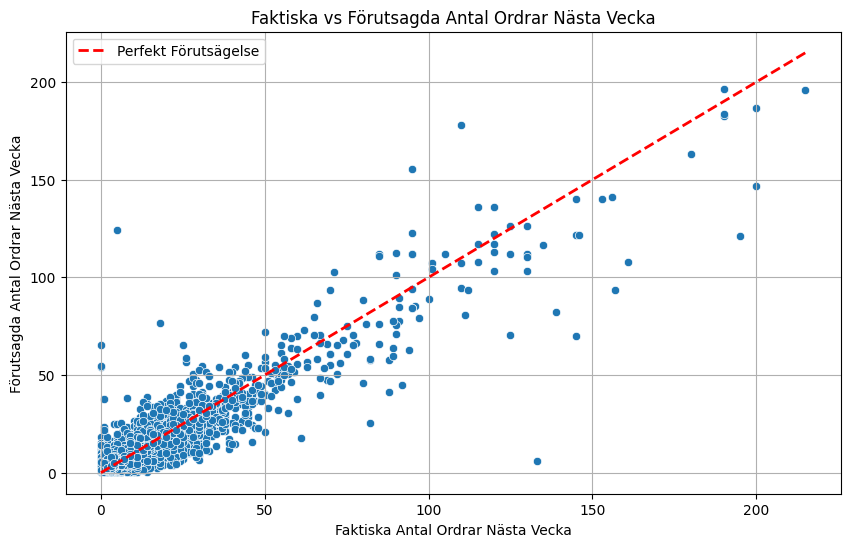

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa ett scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Faktiska Antal Ordrar Nästa Vecka")
plt.ylabel("Förutsagda Antal Ordrar Nästa Vecka")
plt.title("Faktiska vs Förutsagda Antal Ordrar Nästa Vecka")
plt.grid(True)

# Lägg till en diagonal linje som representerar perfekt förutsägelse
# Hitta minsta och största värdet bland faktiska och förutsagda värden för att rita linjen
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfekt Förutsägelse')

plt.legend()
plt.show()

In [43]:
# Visa kolumnnamnen i df_filtered_for_regression
print("Kolumner i df_filtered_for_regression:")
print(df_filtered_for_regression.columns)

Kolumner i df_filtered_for_regression:
Index(['Vecka', 'Artikel_Nummer', 'Antal_ordrar', 'Antal_returer',
       'Antal_returer_foreg_vecka', 'Retur_Procent',
       'Antal_ordrar_nasta_vecka'],
      dtype='object')


## Sammanfattning av Dataanalys och Regressionsmodellering

Denna analys syftar till att förstå och modellera sambandet mellan ordrar och returer för olika artiklar, med ett särskilt fokus på att förutsäga framtida ordrar baserat på historisk data och returbeteende. Processen involverade flera steg, från dataladdning och rengöring till avancerad regressionsmodellering.

**1. Dataladdning och Initial Förberedelse:**
Vi började med att ladda in data från filen 'Data Records.csv'. Rådata var tabb-separerad och krävde viss initial bearbetning för att extrahera kolumnerna korrekt och ta bort oönskade tecken som citationstecken. Kolumnerna fick beskrivande namn som 'Datum', 'Butik', 'Rutt', 'Produkt Type', 'Produkt sort', 'Ordrar', 'Returer', 'Antal_ordrar' och 'Antal_returer'. De ursprungliga kolumnerna 'Ordrar' och 'Returer' togs bort eftersom de numeriska antalskolumnerna var mer relevanta för analysen.

**2. Datumhantering och Veckobaserad Analys:**
För att möjliggöra tidsbaserad analys konverterades 'Datum'-kolumnen till ett datetime-format. Därefter skapades en ny kolumn, 'Vecka', genom att extrahera veckonumret från datumet. Detta var avgörande för att kunna aggregera data på veckonivå.

**3. Skapa Unika Artikelnummer:**
För att unikt identifiera varje produktkombination (baserat på Butik, Rutt, Produkt Typ och Produkt sort) grupperades data och ett unikt 6-siffrigt 'Artikel_Nummer' tilldelades varje grupp. Detta förenklade hanteringen och analysen av individuella artiklar över tid.

**4. Aggregering och Filtrering av Veckodata:**
Den ursprungliga data slås ihop med de unika artikelnumren. Därefter aggregerades data veckovis per artikelnummer genom att summera 'Antal_ordrar' och 'Antal_returer'. För att fokusera på relevanta datapunkter togs rader bort där både 'Antal_ordrar' och 'Antal_returer' var noll, eftersom dessa inte bidrar till analysen av samband mellan ordrar och returer.

**5. Feature Engineering för Tidsbaserad Analys:**
För att analysera sambandet mellan returer en given vecka och ordrar veckan innan, skapades en ny kolumn: 'Antal_returer_foreg_vecka'. Detta gjordes genom att skifta 'Antal_returer'-kolumnen en vecka bakåt inom varje artikelnummergrupp. Rader motsvarande vecka 1 togs bort eftersom det inte fanns någon föregående vecka att beräkna returer från. Eventuella kvarvarande rader med saknade värden (NaN), som uppstod vid skiftningen för den första veckan med data för varje artikel eller den sista veckans 'Antal_ordrar_nasta_vecka', togs bort för att säkerställa dataintegriteten för modellering.

**6. Beräkning av Returprocent:**
En ny kolumn, 'Retur_Procent', skapades för att representera returandelen per vecka för varje artikel. Detta beräknades som (Antal returer / Antal ordrar) * 100. För att hantera fall där antalet ordrar var noll, ersattes division med noll med NaN och fylldes sedan med 0, vilket representerar en returprocent på 0 när inga ordrar gjordes.

**7. Förberedelse för Linjär Regression och Modellträning:**
Målet var att förutsäga nästa veckas ordrar. För att göra detta krävdes en beroende variabel som representerar framtida ordrar. En ny kolumn, 'Antal_ordrar_nasta_vecka', skapades genom att skifta 'Antal_ordrar' en vecka framåt för varje artikelnummer.

För den linjära regressionsmodellen fokuserade vi analysen på artiklar med en returprocent under 10%. Data filtrerades därför för att endast inkludera rader där 'Retur_Procent' var mindre än 10.

De oberoende variablerna för modellen definierades som 'Antal_ordrar' (innevarande vecka), 'Antal_returer_foreg_vecka' och 'Retur_Procent'. Den beroende variabeln var 'Antal_ordrar_nasta_vecka'. Data delades upp i tränings- och testset för att kunna utvärdera modellens prestanda på osedd data. En linjär regressionsmodell från `scikit-learn` tränades sedan med träningsdata.

**8. Modellutvärdering:**
Efter träningen utvärderades modellens prestanda på testsetet med hjälp av standardiserade regressionsmått:
*   **Mean Absolute Error (MAE):** Mätte den genomsnittliga absoluta skillnaden mellan förutsagda och faktiska värden.
*   **Mean Squared Error (MSE):** Gav en större vikt åt större fel.
*   **Root Mean Squared Error (RMSE):** Var i samma enhet som antalet ordrar och gav ett mått på den typiska storleken på förutsägelsefelen.
*   **R-squared (R²):** Indikerade hur stor andel av variationen i nästa veckas ordrar som förklarades av modellen. Ett högt R²-värde indikerade en god förklaringsgrad.

Resultaten från utvärderingen (MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}) gav insikter om modellens noggrannhet i att förutsäga nästa veckas ordrar för artiklar med låg returprocent.

**9. Visualisering av Resultat:**
Ett scatter plot skapades för att visuellt jämföra modellens förutsagda värden med de faktiska värdena för antalet ordrar nästa vecka i testsetet. En diagonal linje lades till för att representera perfekt förutsägelse, vilket hjälpte till att bedöma hur nära modellens förutsägelser låg de verkliga värdena.

**Slutsats och Nästa Steg:**
Genom denna process har vi framgångsrikt laddat, bearbetat och analyserat data för att förstå veckovisa order- och returmönster på artikelnummernivå. Vi har utvecklat en linjär regressionsmodell som kan förutsäga nästa veckas ordrar för artiklar med låg returprocent. Modellens utvärderingsmått och koefficienter ger värdefulla insikter om de faktorer som påverkar framtida ordrar inom denna kategori av artiklar.

Framtida arbete kan inkludera att använda den tränade modellen för att göra förutsägelser på ny data för lagerplanering, utforska mer komplexa modeller för att hantera artiklar med högre returprocent, eller inkludera ytterligare variabler i analysen för att förbättra förutsägelsen. Denna analys ger en solid grund för datadrivna beslut gällande orderhantering och lageroptimering för artiklar med låg returrisk.